In [3]:
import nilearn
import nibabel

In [4]:
from nilearn import datasets

# This will download one subject's resting-state data
# It might take a few minutes depending on your connection
adhd_dataset = datasets.fetch_adhd(n_subjects=1)

# Note the path where the data is stored
fmri_filepath = adhd_dataset.func[0]
print(f"Data downloaded to: {fmri_filepath}")

[fetch_adhd] Added README.md to /Users/harshvardhanpatil/nilearn_data
[fetch_adhd] Dataset created in /Users/harshvardhanpatil/nilearn_data/adhd
[fetch_adhd] Downloading data from https://www.nitrc.org/frs/download.php/7781/adhd40_metadata.tgz ...
[fetch_adhd]  ...done. (1 seconds, 0 min)

[fetch_adhd] Extracting data from /Users/harshvardhanpatil/nilearn_data/adhd/fbef5baff0b388a8c913a08e1d84e059/adhd40_metadata.tgz...
[fetch_adhd] .. done.

[fetch_adhd] Downloading data from https://www.nitrc.org/frs/download.php/7782/adhd40_0010042.tgz ...
Downloaded 212992 of 44414948 bytes (0.5%%,  4.2min remaining)
Downloaded 2179072 of 44414948 bytes (4.9%%,   43.3s remaining)
Downloaded 12427264 of 44414948 bytes (28.0%%,    8.3s remaining)
Downloaded 25010176 of 44414948 bytes (56.3%%,    3.3s remaining)
Downloaded 34881536 of 44414948 bytes (78.5%%,    1.4s remaining)
[fetch_adhd]  ...done. (7 seconds, 0 min)

[fetch_adhd] Extracting data from /Users/harshvardhanpatil/nilearn_data/adhd/e7ff56

In [5]:
import nibabel as nib

# Load the file using the path from yesterday
# Make sure you have the 'fmri_filepath' variable from the download script
img = nib.load(fmri_filepath)

# 1. Check the shape of the data
# It will be in (X, Y, Z, Time) format
data_shape = img.shape
print(f"Data shape: {data_shape}")

# 2. Check the data type
print(f"Data type: {img.get_data_dtype()}")

# 3. Look at the header information
# This contains technical details like voxel size
header = img.header
# The TR (Repetition Time) is crucial. It's how long it took to acquire one 3D volume.
# For fMRI, it's usually stored in the 'pixdim'. The 4th dimension is time.
tr = header['pixdim'][4]
print(f"Repetition Time (TR): {tr} seconds")

# The total number of time points is the last number in the shape
num_timepoints = data_shape[3]
print(f"Number of time points: {num_timepoints}")

Data shape: (61, 73, 61, 176)
Data type: float32
Repetition Time (TR): 2.0 seconds
Number of time points: 176


/var/folders/j8/v96n040974q4qb9lxq1h94nw0000gn/T/ipykernel_4523/3880469225.py:5: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_fmri_img = mean_img(img)
/opt/homebrew/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



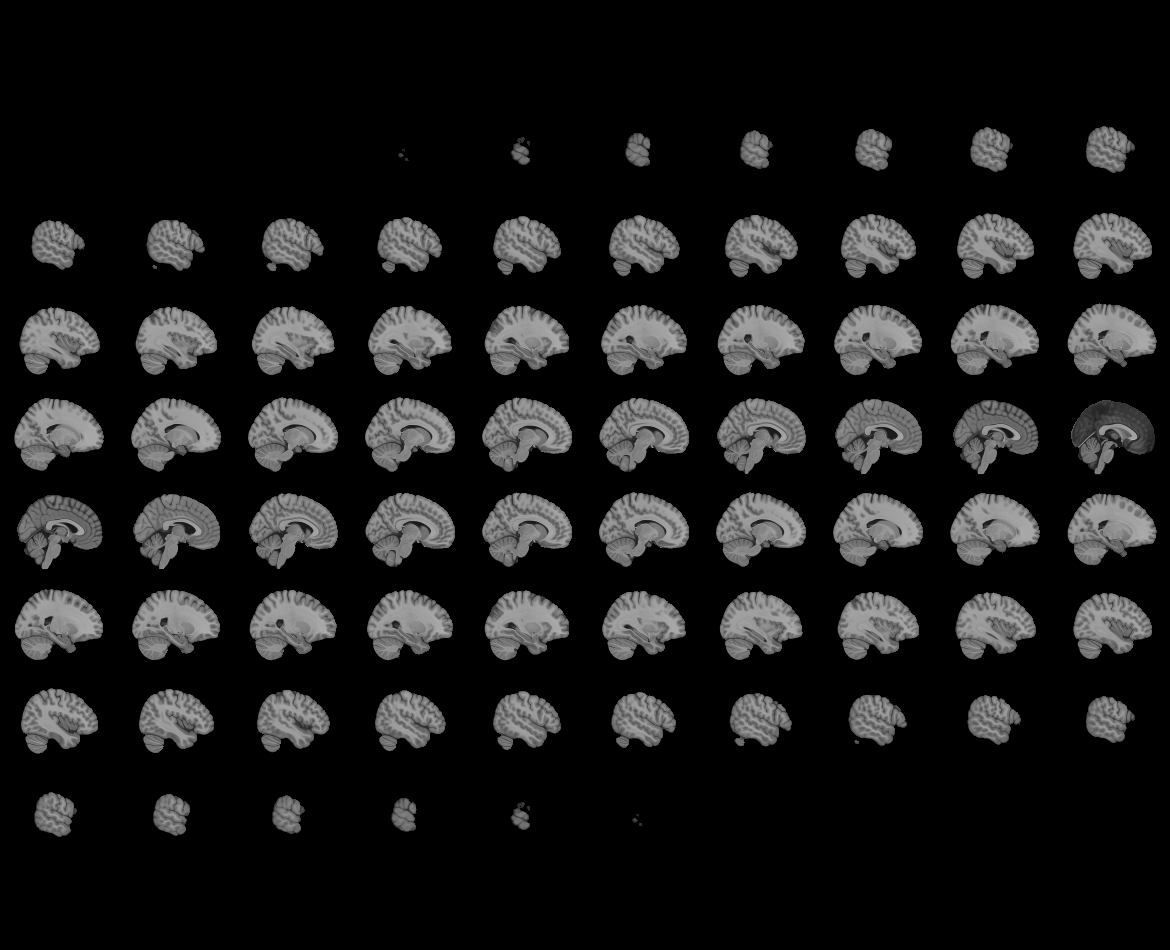
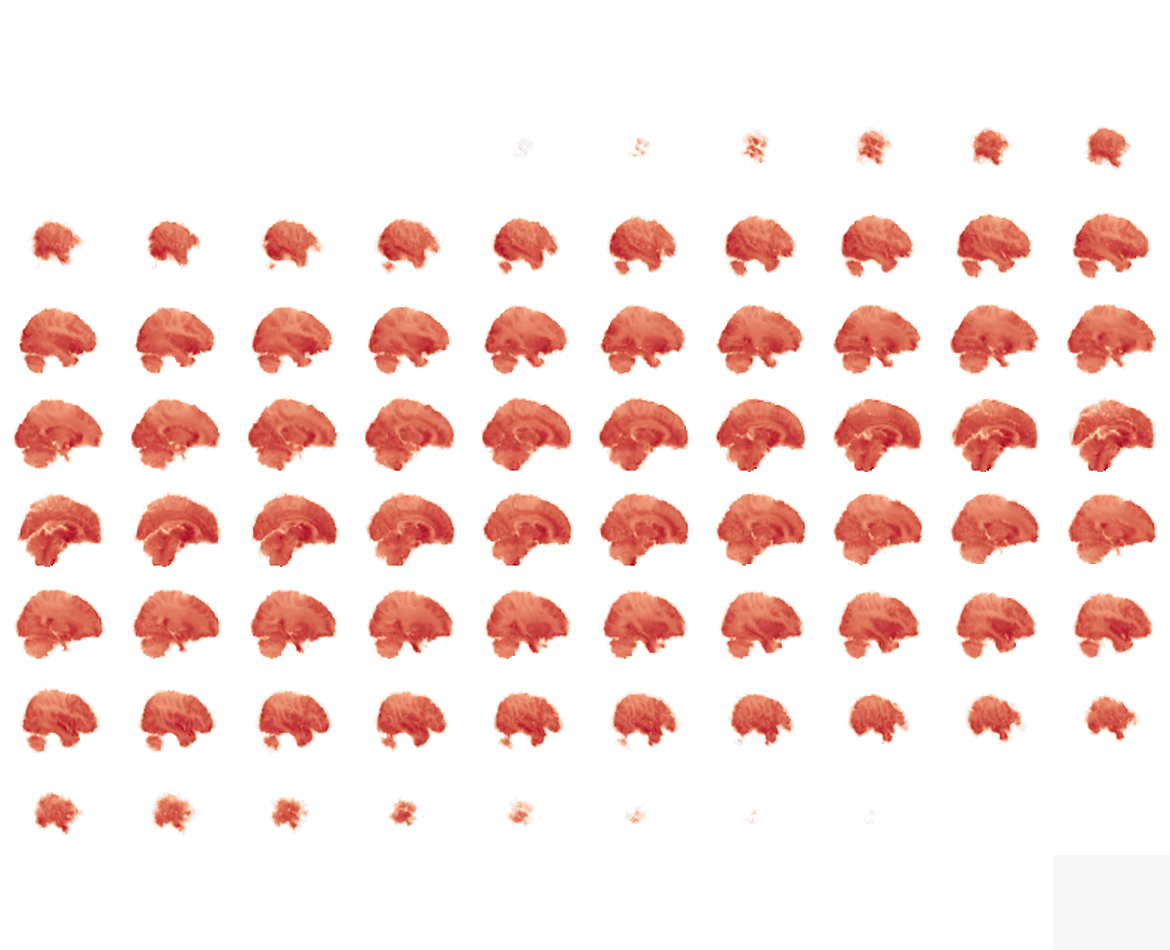

In [6]:
from nilearn import plotting
from nilearn.image import mean_img

# Calculate the mean image across the time dimension
mean_fmri_img = mean_img(img)

# Plot the mean image
# This creates an interactive plot in your Jupyter notebook
plotting.view_img(mean_fmri_img, title="Mean fMRI Image")

In [7]:
from nilearn.maskers import NiftiSpheresMasker

# Define the coordinates for the PCC
pcc_coords = [(0, -53, 26)]

# Create a masker object with a 5mm radius sphere
# This will average the signal within the sphere
masker = NiftiSpheresMasker(seeds=pcc_coords, radius=5)

# Use the masker to extract the time series from our fMRI image
pcc_time_series = masker.fit_transform(img)

print(f"Shape of the extracted time series: {pcc_time_series.shape}")

Shape of the extracted time series: (176, 1)


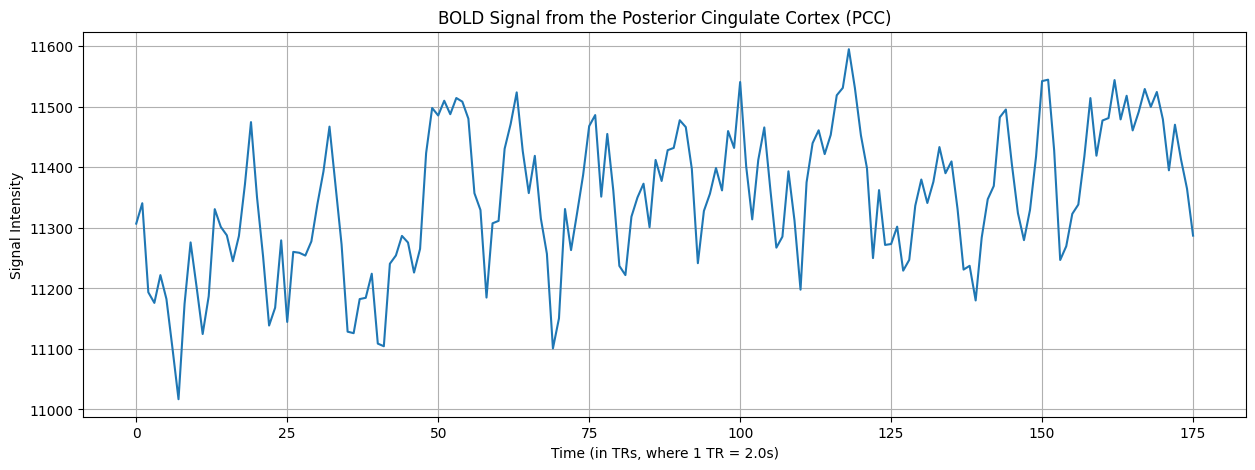

In [8]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(15, 5))
plt.plot(pcc_time_series)
plt.title("BOLD Signal from the Posterior Cingulate Cortex (PCC)")
plt.xlabel(f"Time (in TRs, where 1 TR = {tr}s)")
plt.ylabel("Signal Intensity")
plt.grid(True)
plt.show()

/opt/homebrew/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:870: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



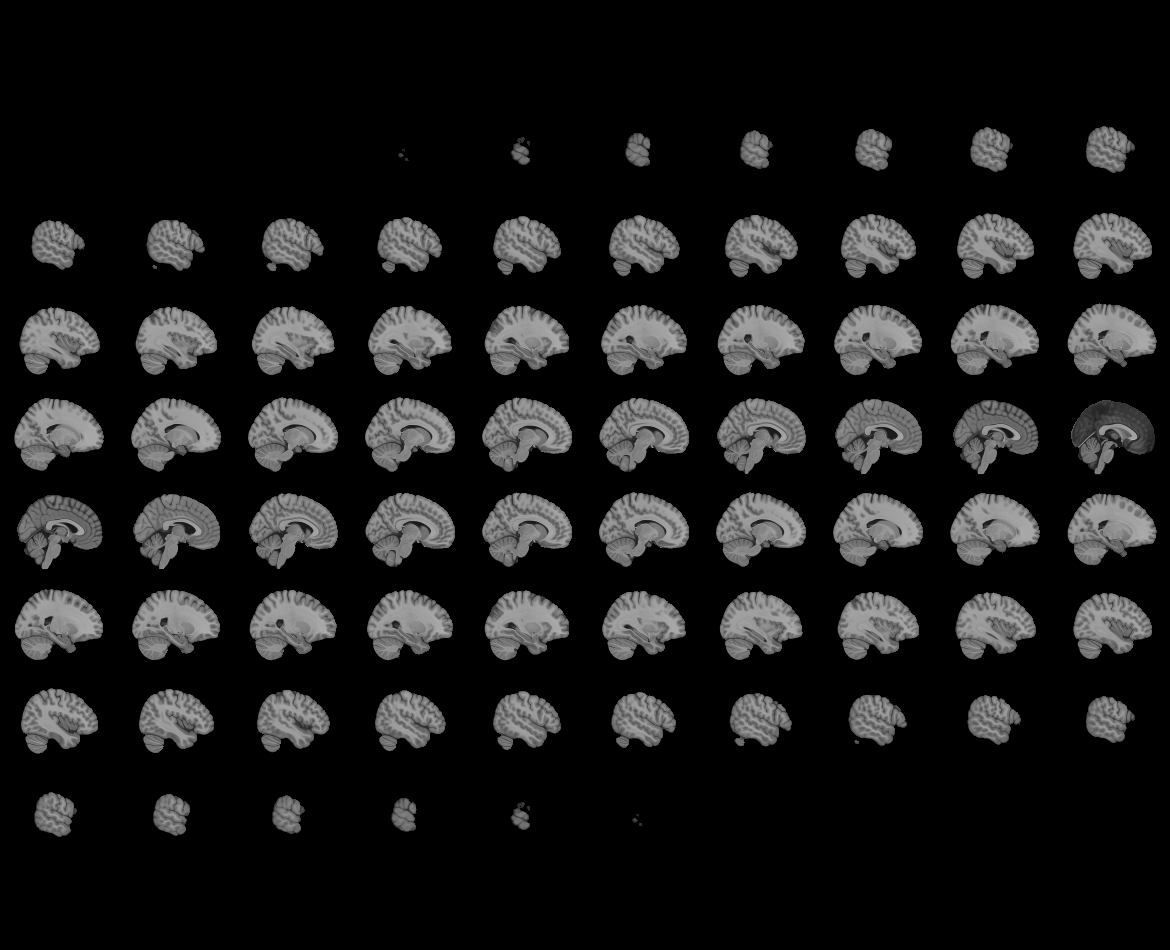
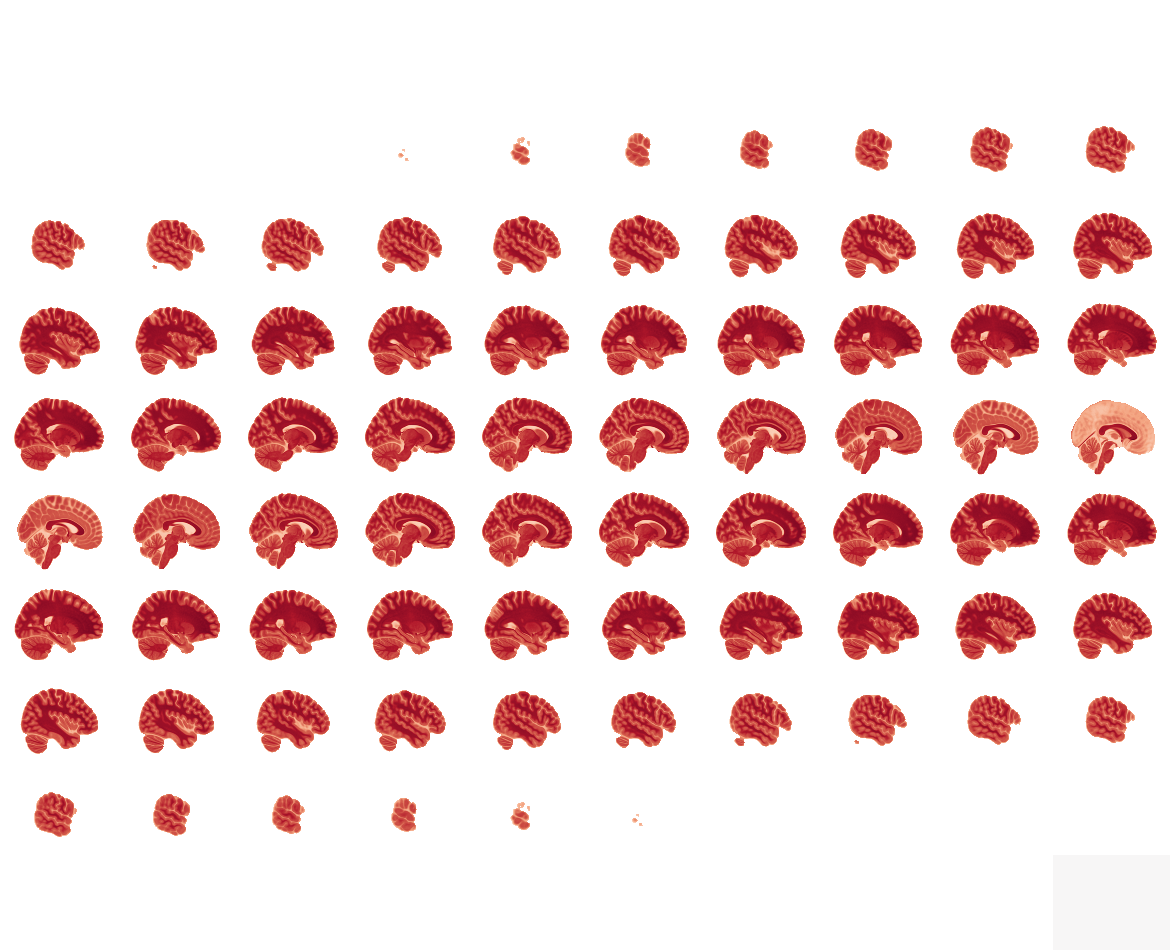

In [9]:
from nilearn import datasets, plotting
import nibabel as nib

# Fetch a sample anatomical T1-weighted MRI image
# Nilearn provides a standard MNI template, which is a common reference brain.
# Alternatively, if the ADHD dataset included T1s, you'd load that.
# For simplicity, let's use the MNI template for now.
# This will download the template if you don't have it
mni_template = datasets.load_mni152_template()

# You can now plot this high-resolution anatomical image
# You'll immediately notice the difference in detail
plotting.view_img(mni_template, title="High-Resolution MNI Anatomical Template")

# If you wanted to load a subject's own anatomical data (if provided with the fMRI data):
# Often in a dataset object like 'adhd_dataset', there would be an 'anat' attribute
# Example (if it existed for this simple fetch):
# if hasattr(adhd_dataset, 'anat') and adhd_dataset.anat:
#     subject_anat_filepath = adhd_dataset.anat[0]
#     subject_anat_img = nib.load(subject_anat_filepath)
#     plotting.view_img(subject_anat_img, title="Subject's High-Resolution Anatomical MRI")

In [10]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import nibabel as nib
from nilearn import datasets

# --- 1. Load the Data ---
# Ensure you have the fmri_filepath from the previous steps
# If not, uncomment the line below to download it again
# fmri_filepath = datasets.fetch_adhd(n_subjects=1).func[0]

img = nib.load(fmri_filepath)
# Get the raw 4D data array
fmri_data = img.get_fdata()

# --- 2. Set up the Plot ---
# We'll fix the Z-axis to look at a single cross-section (slice)
# Let's choose a slice from the middle of the brain
z_slice_index = fmri_data.shape[2] // 2

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 6))
plt.close() # Prevents a static image from displaying before the animation

# --- 3. Define the Animation Function ---
# This function tells the animation what to draw for each frame
def update(frame):
    ax.clear() # Clear the previous frame
    
    # Get the 2D slice for the current time point (frame)
    cross_section = fmri_data[:, :, z_slice_index, frame]
    
    # Display the slice. We use 'viridis' colormap for better contrast
    # The `origin='lower'` makes the image orientation match nilearn plots
    im = ax.imshow(cross_section.T, cmap='viridis', origin='lower')
    
    ax.set_title(f"Time Point: {frame}")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    return [im]

# --- 4. Create and Display the Animation ---
# Create the animation object
# It will run the `update` function for each frame from 0 to the last time point
num_frames = fmri_data.shape[3]
anim = FuncAnimation(fig, update, frames=num_frames, blit=True)

# Convert the animation to an HTML5 video for display in the notebook
HTML(anim.to_html5_video())

In [23]:
/Users/harshvardhanpatil/Desktop/ds000201-master/sub-9001/ses-1/func/sub-9001_ses-1_task-rest_bold.nii.gz

Error: No such file or no access: 'sub-20_ses-01_T1w.nii.gz'


In [2]:
import os
import nibabel as nib

# Use the new, simple filename
fmri_filepath = 'data.nii.gz'

# --- VERIFICATION STEP ---
all_files = os.listdir()
print("Files in this folder:")
print(all_files)

# Check if the simple filename is in the list
if fmri_filepath in all_files:
    print(f"\nSUCCESS: Found '{fmri_filepath}' in the folder.")
    try:
        img = nib.load(fmri_filepath)
        print("Image loaded successfully.")
    except Exception as e:
        print(f"An error occurred while loading the image: {e}")
else:
    print(f"\nFAILURE: The file '{fmri_filepath}' is NOT in this folder.")
    print("Please make sure you have renamed the file correctly in Finder.")

Files in this folder:
['data.nii.gz', '.ipynb_checkpoints', 'Harshu_AIDAO.ipynb']

SUCCESS: Found 'data.nii.gz' in the folder.
An error occurred while loading the image: No such file or no access: 'data.nii.gz'
